In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.linalg import eigh_tridiagonal
from numpy import linalg as LA


#Mohammad Saifullah

In [2]:
df = pd.read_csv("molecule_data.csv",index_col=False)
print(df)

  Molecule    De (eV)     re (Å)          l    (amu) a
0      H2     4.744600      0.7416  0.503910  1.440558
1     LiH     2.515287      1.5956  0.880122  1.799837
2     HCl     4.619070      1.2746  0.980105  2.380570
3      CO    11.225600      1.1283  6.860672  2.594410


In [3]:
def ModifiedMorse(r):
    x = (r-re)/re
    return ( (De) * ( np.exp(-2*alpModifiedMorse*x ) - ( 2 * np.exp(-alpModifiedMorse*x)) ) + (l*(l + 1)*h**2) / (2*mu*r**2) )

def Morse(r): 
    x = r-re
    return (  (De) * (1 - np.exp(-alpMorse*x) )**2 + (l*(l + 1)*h**2) / (2*mu*r**2) - De )
  
def Pseudoharmonic(r):
    return (  (De * r**2)/(re**2) +  ( (De * re**2)/(r**2) ) - 2*De + (l*(l + 1)*h**2) / (2*mu*r**2) - De )    

def harmonic(r):
    return ( ( De/(r**2) ) * (r-re)**2 + + (l*(l + 1)*h**2) / (2*mu*r**2) - De )  

In [4]:
#Data Parameters for H2 molecule 

mu = 4.6939e8
re = 0.7416
De = 4.7446 
alpMorse = 1.44055
alpModifiedMorse = 1.44055
l = 0 
h = 1973

x_list0 = np.linspace(0,4,100)
x_list1 = np.linspace(0.15,2.5,1000)
x_list2 = np.linspace(0.3,5,1000)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

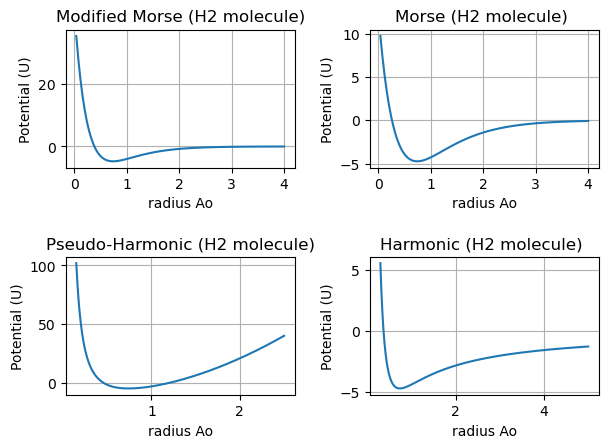

In [5]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x_list0,ModifiedMorse(x_list0))
plt.title("Modified Morse (H2 molecule)")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2,2,2)
plt.plot(x_list0,Morse(x_list0))
plt.title("Morse (H2 molecule) ")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x_list1,Pseudoharmonic(x_list1))
plt.title("Pseudo-Harmonic (H2 molecule)")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x_list2,harmonic(x_list2))
plt.title("Harmonic (H2 molecule) ")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

fig.tight_layout(pad=1.85)

plt.show()

In [6]:
N = 1000
x_list3 , step = np.linspace(0.1,1,N+1,retstep= True)
c = -0.00414662/(step**2)

In [7]:
d = -2*c + Morse(x_list3)[1:-1]
e = c*np.ones(len(d)-1)

eigenvalues , eigenvectors = eigh_tridiagonal(d, e)


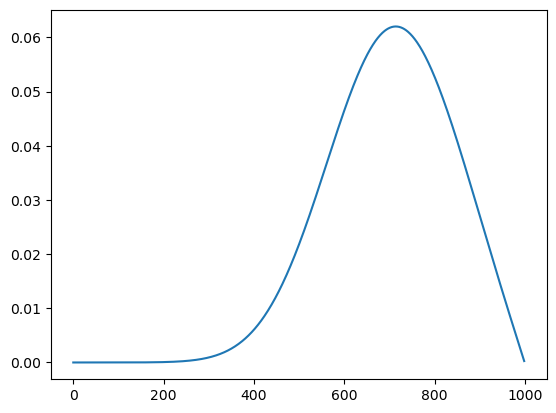

In [8]:
plt.plot(eigenvectors.T[0])

In [9]:
eigenvalues[0]

-4.52172310228136

# Alternate method

In [10]:
N = 1000
y_list = np.linspace(0,1,N+1)[1:-1]
dy = 1/N 
j = -0.00414662/(dy**2)

m = -2*j + Morse(y_list)
n = j*np.ones(len(m)-1)

print(len(m))
print(len(n))

999
998


In [11]:
A = np.diag(n,k=1)
B = np.diag(n,k=-1)
C = np.diag(m,k=0)

D = A + B + C 


In [12]:
D

array([[ 8305.73668247, -4146.62      ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [-4146.62      ,  8305.66108806, -4146.62      , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , -4146.62      ,  8305.58576821, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
         8288.94498042, -4146.62      ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
        -4146.62      ,  8288.94789561, -4146.62      ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        , -4146.62      ,  8288.95081601]])

In [13]:
E , Psi = np.linalg.eig(D)

In [14]:
E_new = np.argsort(E)
Psi = Psi[:,E_new]


-4.018135322796937

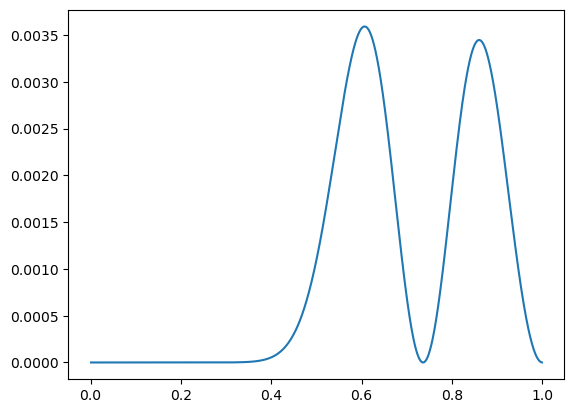

In [15]:
plt.plot(y_list,Psi[:,1]**2)
E[E_new[1]]

In [16]:
np.sum(Psi[:,1]*Psi[:,1])

0.9999999999999999

In [17]:
x = np.array([1,4,3,6,5,0,2])
x_new = np.argsort(x)

In [18]:
x[x_new][-1]

6